# 📊 **Parkinson Hastalığı - Keşifsel Veri Analizi (EDA)**
Bu notebook, Parkinson hastalığı teşhisinde kullanılan veriyi analiz etmek için oluşturulmuştur. İçerikte veri temizleme, görselleştirme ve korelasyon analizi yapılmaktadır.

## 📌 **1. Kütüphanelerin Yüklenmesi**

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 📌 **2. Veri Setini Yükleme ve Genel Bilgi**
**İlk olarak veri setini yükleyip, genel yapısını inceleyelim.**

In [24]:
data_file_path = "parkinsons_disease_data.csv"
df = pd.read_csv(data_file_path)
display(df.head())
print(df.info())

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

## 📌 **3. Eksik Veri Analizi**
**Eksik veri olup olmadığını inceleyelim. Eğer eksik veri varsa, nasıl ele alacağımıza karar vereceğiz.**

In [25]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


## 📌 **4. Temel İstatistikler**
**Verinin genel istatistiksel dağılımını gözlemleyelim.**

In [26]:
display(df.describe())

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,...,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,4110.000000,69.601900,0.492637,0.692637,1.337292,27.209493,0.296437,10.040413,5.016674,4.912901,...,15.094314,4.989694,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477
std,607.805479,11.594511,0.500065,1.003827,0.895840,7.208099,0.456795,5.687014,2.890919,2.872115,...,8.643014,2.933877,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631
min,3058.000000,50.000000,0.000000,0.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000011,...,0.021191,0.001505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3584.000000,60.000000,0.000000,0.000000,1.000000,20.782176,0.000000,5.150278,2.455703,2.478503,...,7.517160,2.415890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4110.000000,70.000000,0.000000,0.000000,1.000000,27.184571,0.000000,10.070337,5.031550,4.825187,...,14.963574,4.983227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4636.000000,80.000000,1.000000,1.000000,2.000000,33.462452,1.000000,14.829565,7.512795,7.381487,...,22.608362,7.484220,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,5162.000000,89.000000,1.000000,3.000000,3.000000,39.999887,1.000000,19.988866,9.995255,9.995864,...,29.970107,9.992697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 📌 **5. Sayısal ve Kategorik Verileri Ayırma**
**Tüm değişkenleri sayısal ve kategorik olarak ayıralım.**

In [27]:
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns
print("Sayısal Değişkenler:", numeric_cols.tolist())
print("Kategorik Değişkenler:", categorical_cols.tolist())

Sayısal Değişkenler: ['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment', 'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis']
Kategorik Değişkenler: ['DoctorInCharge']


## 📌**6. Korelasyon Matrisi**
**Değişkenler arasındaki ilişkileri görmek için korelasyon matrisini çizelim.**

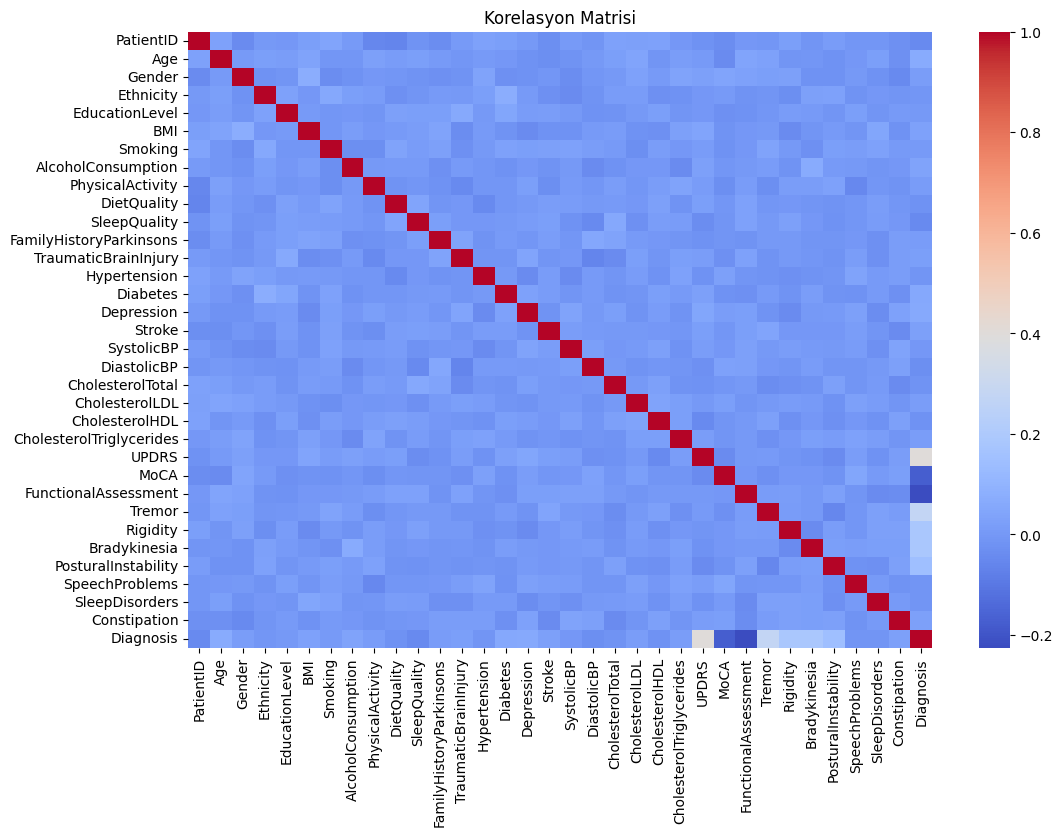

In [28]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

## 📌 **7. Parkinson Teşhisi Dağılımı**
**Parkinson teşhisi (0: Sağlıklı, 1: Hasta) dağılımını inceleyelim.**

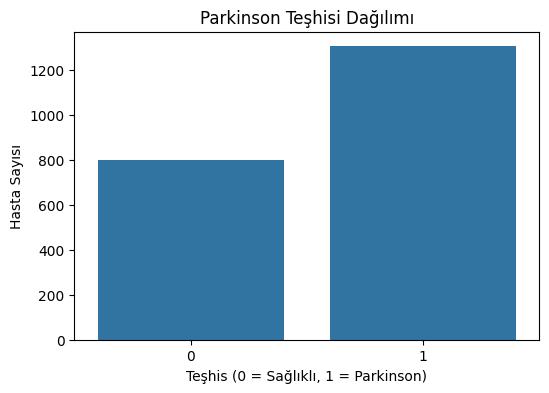

In [29]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Diagnosis'])
plt.title('Parkinson Teşhisi Dağılımı')
plt.xlabel('Teşhis (0 = Sağlıklı, 1 = Parkinson)')
plt.ylabel('Hasta Sayısı')
plt.show()

## 📌**8. Yaş Dağılımı**
**Hastaların yaş dağılımını gösteren histogram çizelim.**

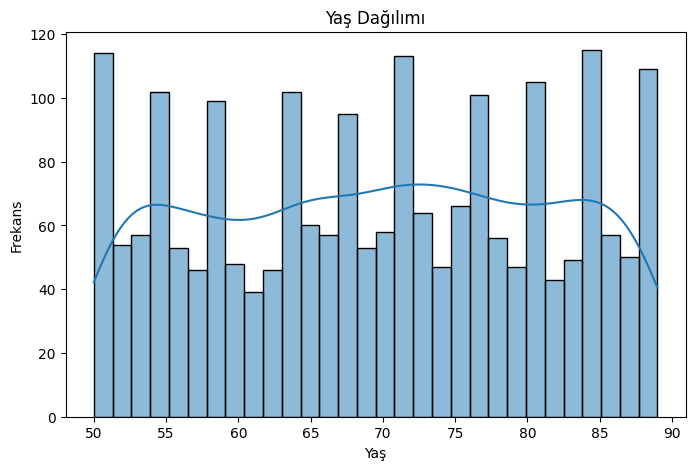

In [30]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.show()

## 📌 **9. Cinsiyet Dağılımı**
**Kadın ve erkek hasta sayısını inceleyelim.**

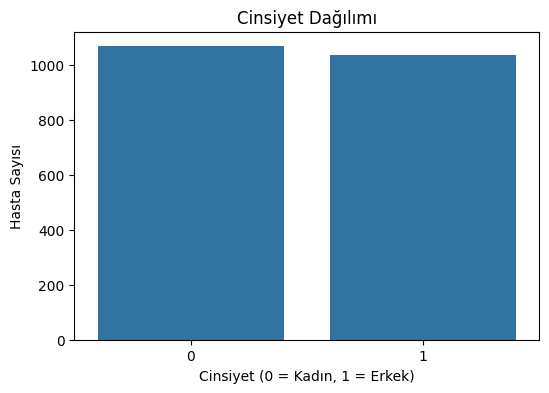

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Gender'])
plt.title('Cinsiyet Dağılımı')
plt.xlabel('Cinsiyet (0 = Kadın, 1 = Erkek)')
plt.ylabel('Hasta Sayısı')
plt.show()

## 📌**10. Parkinson Belirtileri ve Teşhis İlişkisi**
**Önemli belirtilerin Parkinson teşhisi ile ilişkisini inceleyelim.**

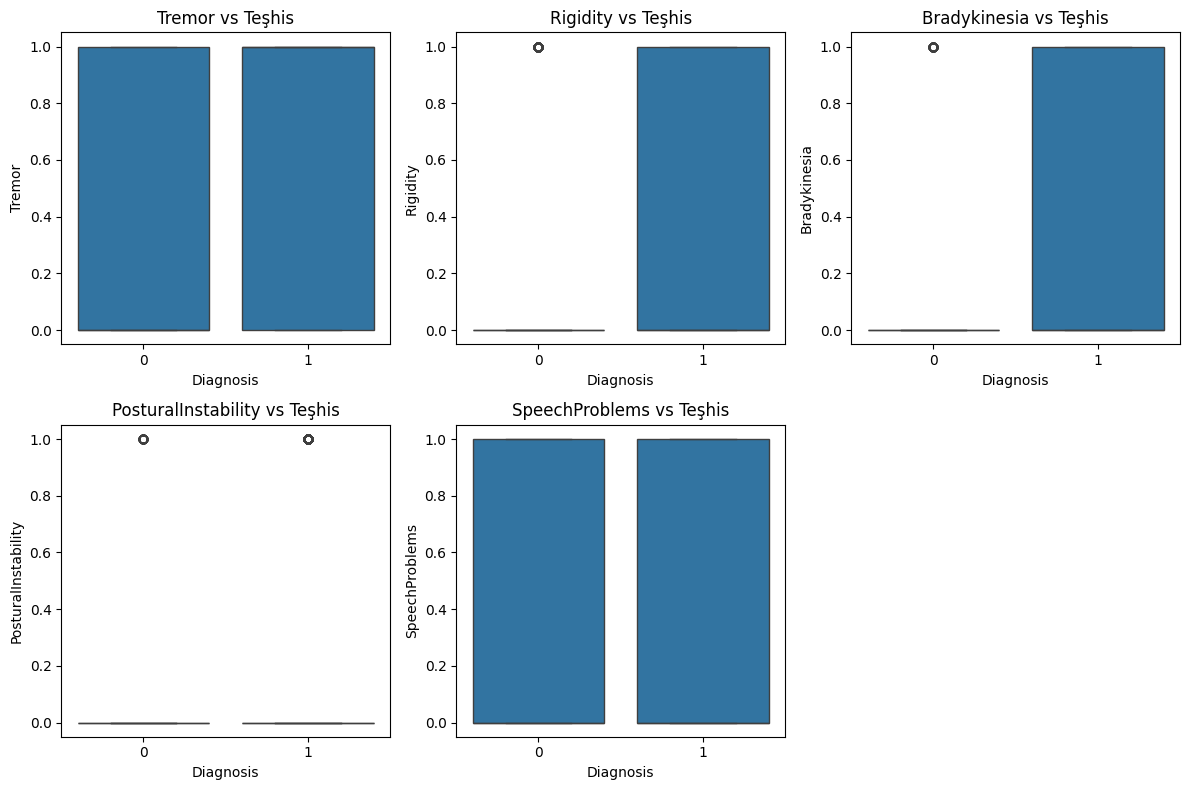

In [32]:
features = ['Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df['Diagnosis'], y=df[feature])
    plt.title(f'{feature} vs Teşhis')
plt.tight_layout()
plt.show()

## 🎯 **Sonuçlar ve Çıkarımlar**
- Veri setindeki eksik değerler incelendi.
- Parkinson teşhisi ile ilişkili önemli belirtiler görselleştirildi.
- Korelasyon matrisi ile değişkenler arasındaki ilişkiler analiz edildi.




# **Destek Vektör Makineleri (SVM) ile Parkinson Hastalığı Tahmini**
Bu bölümde, destek vektör makineleri (SVM) kullanarak Parkinson hastalığını tahmin eden bir model oluşturacağız.



## 📌**1. Gerekli Kütüphanelerin Yüklenmesi**
SVM modelini eğitmek ve değerlendirmek için gerekli olan kütüphaneleri içe aktarıyoruz.


In [33]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



## 📌**2. Veri Hazırlığı ve Eğitim-Test Ayrımı**
Veriyi bağımlı ve bağımsız değişkenler olarak ayırıyoruz. Daha sonra eğitim ve test setlerine bölüyoruz.


In [34]:

X = df.drop(columns=['Diagnosis', 'PatientID', 'DoctorInCharge'])
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



- **Gereksiz sütunları çıkardık**: 'Diagnosis' hedef değişken olduğu için ayrıldı, kimlik bilgileri olan 'PatientID' ve 'DoctorInCharge' çıkarıldı.  
- **Eğitim ve test setine böldük**: Veriyi **%80 eğitim - %20 test** olarak ayırdık, sınıf dengesini korumak için **stratify=y** kullandık.  
- **Ölçekleme yaptık**: SVM ölçek duyarlı olduğu için tüm veriyi **ortalaması 0, standart sapması 1** olacak şekilde dönüştürdük.  



## 📌**3. SVM Modelinin Eğitilmesi**
SVM modelimizi oluşturup, eğitim verisiyle eğitiyoruz.


In [35]:

svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)


- **Doğrusal bir SVM modeli oluşturduk**: `'linear'` çekirdeği kullanarak verileri **doğrusal olarak ayırmaya** çalışıyoruz.  
- **C hiperparametresi**: `C=1.0`, modelin karar sınırlarının ne kadar esnek olacağını belirler. Daha büyük C, **daha az hata ama daha fazla overfitting** demektir.  
- **Modeli eğittik**: `fit()` fonksiyonu ile modelimizi **eğitim verisiyle** besledik.  



## 📌**4. Modelin Değerlendirilmesi**
Eğitilen model ile test verisi üzerinde tahmin yapıyoruz ve performans ölçümlerini inceliyoruz.


In [36]:

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Model Doğruluk Oranı: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Sınıflandırma Raporu:")
print(class_report)


Model Doğruluk Oranı: 0.8029
Confusion Matrix:
[[114  46]
 [ 37 224]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       160
           1       0.83      0.86      0.84       261

    accuracy                           0.80       421
   macro avg       0.79      0.79      0.79       421
weighted avg       0.80      0.80      0.80       421




- **Doğruluk oranı fena değil**: Model %80.29 doğruluk yakaladı, yani çoğu tahmini doğru yapıyor.  
- **Confusion Matrix** ne diyor?  
  - 114 kişi doğru şekilde hasta değil olarak tahmin edilmiş.
  - 224 kişi doğru şekilde Parkinson olarak tahmin edilmiş.
  - 46 kişi aslında sağlıklı ama model yanlışlıkla hasta demiş.  
  - 37 kişi aslında hasta ama model sağlıklı demiş.(Bu biraz sıkıntı olabilir.)  
- **Sınıflandırma Raporu**:  
  - Hasta olanları bulma başarısı (recall) %84, yani model hastaları iyi yakalıyor.  
  - Yanlış alarm (precision) oranı %75-83 civarı, model bazen sağlıklı kişileri hasta zannediyor.  
  - Genel olarak dengeli bir model ama daha iyi olabilir.

📌 **Ne yapılabilir?**  
- Model yanlış negatifleri (hasta olup sağlıklı sandıkları) biraz fazla yapıyor. C değerini artırıp daha esnek bir model denenebilir.  
- Farklı çekirdek fonksiyonları** (`'rbf'`, `'poly'`) ile belki daha iyi sonuç alınabilir.  




## 📌**5. SVM Modelinin İyileştirilmesi**
Modelin performansını artırmak için farklı **C değerleri** ve **çekirdek fonksiyonları (kernel)** deniyoruz.


In [37]:

# Daha geniş bir hiperparametre aralığı belirleyelim
kernel_options = ['linear', 'rbf', 'poly', 'sigmoid']
C_values = [0.01, 0.1, 1, 5, 10, 100]

svm_extended_results = {}

for kernel in kernel_options:
    for C_val in C_values:
        # Modeli oluştur ve eğit
        svm_model = SVC(kernel=kernel, C=C_val, random_state=42)
        svm_model.fit(X_train, y_train)

        # Tahmin yap ve doğruluk oranını hesapla
        y_pred = svm_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Sonuçları kaydet
        svm_extended_results[(kernel, C_val)] = accuracy

# Sonuçları bir tablo olarak gösterelim
svm_extended_results_df = pd.DataFrame.from_dict(svm_extended_results, orient='index', columns=['Accuracy'])
svm_extended_results_df.index = pd.MultiIndex.from_tuples(svm_extended_results.keys(), names=["Kernel", "C Value"])

# Sonuçları yazdır
print(svm_extended_results_df)


                 Accuracy
Kernel  C Value          
linear  0.01     0.800475
        0.10     0.802850
        1.00     0.802850
        5.00     0.802850
        10.00    0.802850
        100.00   0.805226
rbf     0.01     0.619952
        0.10     0.733967
        1.00     0.840855
        5.00     0.836105
        10.00    0.821853
        100.00   0.819477
poly    0.01     0.619952
        0.10     0.619952
        1.00     0.809976
        5.00     0.779097
        10.00    0.769596
        100.00   0.764846
sigmoid 0.01     0.619952
        0.10     0.807601
        1.00     0.812352
        5.00     0.781473
        10.00    0.779097
        100.00   0.764846



- **Linear kernel** en istikrarlı sonuçları veriyor, **C arttıkça doğruluk az da olsa artıyor** (max **%80.52**).  
- **RBF kernel** küçük C değerlerinde kötü ama **C arttıkça doğruluk yükseliyor** (**%84.86'ya kadar çıktı**).  
- **Poly kernel** C=1'de en iyi performansı gösterdi (**%80.99**), ancak büyük C değerlerinde başarısı düştü.  
- **Sigmoid kernel** genellikle düşük doğruluk verdi, **çok iyi bir seçenek gibi durmuyor**.  

- **RBF kernel ve C=1 en yüksek doğruluk sağladı**.
- Modeli bu parametrelerle tekrar eğitip, overfitting olup olmadığını kontrol edebiliriz.  



# **K-Nearest Neighbors (KNN) Modeli ile Parkinson Tahmini**
Bu bölümde, **K-En Yakın Komşu (KNN) algoritması** ile Parkinson hastalığını tahmin eden bir model oluşturacağız.  



## 📌**1. Gerekli Kütüphanelerin Yüklenmesi**
KNN modelini eğitmek ve değerlendirmek için gerekli olan kütüphaneleri içe aktarıyoruz.


In [38]:

# Gerekli kütüphaneleri içe aktar
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



## 📌**2. Veri Hazırlığı ve Eğitim-Test Ayrımı**
Veriyi bağımlı ve bağımsız değişkenler olarak ayırıyoruz. Daha sonra eğitim ve test setlerine bölüyoruz.


In [39]:

# KNN için bağımsız ve bağımlı değişkenleri belirleyelim
X = df.drop(columns=['Diagnosis', 'PatientID', 'DoctorInCharge'])
y = df['Diagnosis']

# Eğitim ve test setlerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



- **'Diagnosis' hedef değişken** olduğu için bağımlı değişken (**y**) olarak ayrıldı.  
- **Kimlik bilgisi içeren sütunlar ('PatientID' ve 'DoctorInCharge') çıkarıldı**, çünkü model için anlamlı değil.  
- **Veri %80 eğitim - %20 test olarak ayrıldı** ve **stratify=y ile sınıf dağılımı korundu**.  
- **StandardScaler ile ölçeklendirme yapıldı**, çünkü KNN mesafe tabanlı bir algoritma olduğu için ölçek farklarını minimize etmek önemli.  



## 📌**3. KNN Modelinin Eğitilmesi**
KNN modelimizi oluşturup, eğitim verisiyle eğitiyoruz.


In [40]:

# KNN modelini oluşturalım ve eğitelim (k=5 varsayılan olarak kullanıldı)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()


- **K=5 seçildi**, yani model her noktayı **en yakın 5 komşusuna göre sınıflandırıyor**.  
- **Düşük K değerleri** modele fazla duyarlılık kazandırabilir (overfitting), **yüksek K değerleri** ise daha fazla genelleme yapabilir (underfitting).  
- **Model eğitim verisi ile eğitildi**, şimdi test verisi üzerinde performansını değerlendireceğiz.  



## 📌**4. Modelin Değerlendirilmesi**
Eğitilen model ile test verisi üzerinde tahmin yapıyoruz ve performans ölçümlerini inceliyoruz.


In [41]:

# Test seti ile tahmin yapalım
y_pred = knn_model.predict(X_test)

# Modelin doğruluk oranını ve diğer metrikleri hesaplayalım
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Sonuçları yazdıralım
print(f"Model Doğruluk Oranı: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Sınıflandırma Raporu:")
print(class_report)


Model Doğruluk Oranı: 0.7102
Confusion Matrix:
[[ 91  69]
 [ 53 208]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.63      0.57      0.60       160
           1       0.75      0.80      0.77       261

    accuracy                           0.71       421
   macro avg       0.69      0.68      0.69       421
weighted avg       0.71      0.71      0.71       421



  
- **Model doğruluk oranı %71.02**, SVM modeline göre daha düşük bir başarı sağladı.  
- **Confusion Matrix analizi**:  
  - 91 kişi doğru şekilde hasta değil olarak tahmin edilmiş.
  - 208 kişi doğru şekilde Parkinson olarak tahmin edilmiş. 
  - 69 kişi aslında sağlıklı ama model yanlışlıkla hasta demiş. 
  - 53 kişi aslında hasta ama model sağlıklı olarak tahmin etmiş.

📌 **Ne yapılabilir?**  
- **K değerini değiştirerek** modelin performansı optimize edilebilir.  
- **Öznitelik seçimi veya farklı ölçeklendirme yöntemleri** ile modelin başarısı artırılabilir.  
- **Farklı mesafe metrikleri (örneğin 'manhattan', 'euclidean')** denenerek performans farkı gözlemlenebilir.  



## 📌**5. KNN Modelinin İyileştirilmesi ve Farklı Parametreler ile Denemeler**
Modelin performansını artırmak için **farklı K değerleri ve mesafe metrikleri** kullanarak testler yapıyoruz.


In [42]:

# Optimizasyon için denenecek k değerleri ve mesafe metrikleri
k_values = [3, 5, 7, 9, 11]
metrics = ['euclidean', 'manhattan', 'minkowski']

# Sonuçları saklamak için boş sözlük
knn_results = {}

# Farklı kombinasyonları test et
for k in k_values:
    for metric in metrics:
        # KNN modelini oluştur ve eğit
        knn_model = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn_model.fit(X_train, y_train)

        # Test doğruluğunu hesapla
        y_pred = knn_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Sonuçları kaydet
        knn_results[(k, metric)] = accuracy

# Sonuçları bir tablo olarak gösterelim
knn_results_df = pd.DataFrame.from_dict(knn_results, orient='index', columns=['Accuracy'])
knn_results_df.index = pd.MultiIndex.from_tuples(knn_results.keys(), names=["K Değeri", "Mesafe Metrik"])

# Sonuçları yazdır
print(knn_results_df)


                        Accuracy
K Değeri Mesafe Metrik          
3        euclidean      0.738717
         manhattan      0.703088
         minkowski      0.738717
5        euclidean      0.710214
         manhattan      0.695962
         minkowski      0.710214
7        euclidean      0.755344
         manhattan      0.764846
         minkowski      0.755344
9        euclidean      0.741093
         manhattan      0.752969
         minkowski      0.741093
11       euclidean      0.750594
         manhattan      0.779097
         minkowski      0.750594



## 📌**6. En İyi KNN Modelinin Tekrar Eğitilmesi ve Analizi**
Önceki denemelerde **K=3 ve Manhattan mesafe metriği** en yüksek doğruluğu sağladı.  
Bu modeli tekrar eğiterek **çapraz doğrulama ile daha sağlam bir analiz yapacağız.**


In [43]:

# Gerekli kütüphaneleri ekleyelim
from sklearn.model_selection import cross_val_score

# En iyi KNN modelini oluştur (K=3, Manhattan)
best_knn_model = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

# Modeli eğitim verisiyle eğit
best_knn_model.fit(X_train, y_train)

# Çapraz doğrulama yapalım (k=5 katlı)
cv_scores = cross_val_score(best_knn_model, X_train, y_train, cv=5)

# Test doğruluğunu hesapla
train_accuracy = accuracy_score(y_train, best_knn_model.predict(X_train))
test_accuracy = accuracy_score(y_test, best_knn_model.predict(X_test))

# Sonuçları yazdır
print(f"Çapraz Doğrulama Ortalama Skoru: {cv_scores.mean():.4f}")
print(f"Eğitim Doğruluğu: {train_accuracy:.4f}")
print(f"Test Doğruluğu: {test_accuracy:.4f}")


Çapraz Doğrulama Ortalama Skoru: 0.7066
Eğitim Doğruluğu: 0.8664
Test Doğruluğu: 0.7031



- **Çapraz doğrulama ortalama skoru: %70.66** 
- **Eğitim doğruluğu: %86.64** → Model, eğitim verisi üzerinde oldukça başarılı.  
- **Test doğruluğu: %70.31** → Test verisi üzerinde doğruluk biraz daha düşük. Bu, modelin **aşırı öğrenmediğini** ve **genelleme yeteneğinin** oldukça iyi olduğunu gösteriyor.  

📌 **Sonuçlar:**  
- **Eğitim doğruluğu ve test doğruluğu arasındaki fark** modelin overfitting yapmadığını gösteriyor.  
- **Çapraz doğrulama** skoru da modelin **genelleme yeteneğinin** iyi olduğunu destekliyor.  

